In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
!pip install ccxt
import ccxt as ccxt

In [5]:
import pandas as pd
MarketDf = pd.read_csv("TotalMarketCSV File.csv")

In [6]:
MarketDf.shape
MarketDf.info

<bound method DataFrame.info of       Unnamed: 0  24h_volume_usd  available_supply                 id  \
0              0    9.007640e+09      1.672352e+07            bitcoin   
1              1    1.551330e+09      9.616537e+07           ethereum   
2              2    1.111350e+09      1.684044e+07       bitcoin-cash   
3              3    2.936090e+09      2.779530e+09               iota   
4              4    2.315050e+08      3.873915e+10             ripple   
...          ...             ...               ...                ...   
1321        1321             NaN               NaN          turbocoin   
1322        1322             NaN               NaN              birds   
1323        1323             NaN               NaN  bitcoincashscrypt   
1324        1324             NaN               NaN          swisscoin   
1325        1325             NaN               NaN          faceblock   

      last_updated  market_cap_usd    max_supply               name  \
0       1512549554  

In [7]:
MarketDf.isnull().sum()

Unnamed: 0               0
24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64

In [8]:
d1 = MarketDf.dropna()
print(d1)

      Unnamed: 0  24h_volume_usd  available_supply                  id  \
0              0    9.007640e+09      1.672352e+07             bitcoin   
2              2    1.111350e+09      1.684044e+07        bitcoin-cash   
3              3    2.936090e+09      2.779530e+09                iota   
4              4    2.315050e+08      3.873915e+10              ripple   
5              5    2.289430e+08      7.736420e+06                dash   
...          ...             ...               ...                 ...   
1020        1020    6.909060e+01      1.662700e+04              enigma   
1021        1021    1.300720e+02      1.994860e+05             ulatech   
1024        1024    2.231020e+02      4.213000e+05  digital-money-bits   
1028        1028    4.271860e+01      8.714000e+04          caliphcoin   
1030        1030    1.718820e+02      7.924200e+04       applecoin-apw   

      last_updated  market_cap_usd    max_supply                name  \
0       1512549554    2.130490e+11  2.1

In [9]:
d1.isnull().sum()

Unnamed: 0            0
24h_volume_usd        0
available_supply      0
id                    0
last_updated          0
market_cap_usd        0
max_supply            0
name                  0
percent_change_1h     0
percent_change_24h    0
percent_change_7d     0
price_btc             0
price_usd             0
rank                  0
symbol                0
total_supply          0
dtype: int64

In [10]:
df = pd.DataFrame(d1)
print(df)

      Unnamed: 0  24h_volume_usd  available_supply                  id  \
0              0    9.007640e+09      1.672352e+07             bitcoin   
2              2    1.111350e+09      1.684044e+07        bitcoin-cash   
3              3    2.936090e+09      2.779530e+09                iota   
4              4    2.315050e+08      3.873915e+10              ripple   
5              5    2.289430e+08      7.736420e+06                dash   
...          ...             ...               ...                 ...   
1020        1020    6.909060e+01      1.662700e+04              enigma   
1021        1021    1.300720e+02      1.994860e+05             ulatech   
1024        1024    2.231020e+02      4.213000e+05  digital-money-bits   
1028        1028    4.271860e+01      8.714000e+04          caliphcoin   
1030        1030    1.718820e+02      7.924200e+04       applecoin-apw   

      last_updated  market_cap_usd    max_supply                name  \
0       1512549554    2.130490e+11  2.1

In [11]:
df_clean = df[['24h_volume_usd', 'available_supply', 
               'last_updated', 'market_cap_usd', 'max_supply', 
               'name','percent_change_1h', 'percent_change_24h',
               'percent_change_7d','price_btc','price_usd', 'symbol', 
               'total_supply']]
df_clean.head()

,24h_volume_usd,available_supply,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,symbol,total_supply
0,9.007640e+09,1.672352e+07,1512549554,2.130490e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,BTC,1.672352e+07
2,1.111350e+09,1.684044e+07,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,MIOTA,2.779530e+09
4,2.315050e+08,3.873915e+10,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,XRP,9.999309e+10
5,2.289430e+08,7.736420e+06,1512549542,5.794076e+09,1.890000e+07,Dash,1.22,-3.31,10.64,0.059856,748.935000,DASH,7.736420e+06


In [12]:
import pandas as pd
#Read the dataframe
df =  df_clean

#Group the data by column "market_cap_usd" and compute the mean of the column "price_btc" for each group
df_grouped = df.groupby("price_btc")["market_cap_usd"].mean()
df_aggregated = df.groupby("price_usd").agg({"percent_change_1h":["mean", "std"],
                                            "percent_change_24h":["mean", "std"],
                                             "percent_change_7d":["mean", "std"]})
#Group the data by column "price_usd" and apply a custom function to the groups
def custom_function(x):
    return x.max() - x.min()
df_percent = df.groupby("price_usd").agg({"percent_change_1h": custom_function,
                                         "percent_change_24h": custom_function,
                                         "percent_change_7d" : custom_function,})
#Compute the rolling average of a data frame with a window the size of 2
df_rolling = df.rolling(window=2).mean()
print(df_rolling)

      24h_volume_usd  available_supply  last_updated  market_cap_usd  \
0                NaN               NaN           NaN             NaN   
2       5.059495e+09      1.678198e+07  1.512550e+09    1.191724e+11   
3       2.023720e+09      1.398185e+09  1.512550e+09    2.002405e+10   
4       1.583798e+09      2.075934e+10  1.512550e+09    1.205879e+10   
5       2.302240e+08      1.937344e+10  1.512550e+09    7.579709e+09   
...              ...               ...           ...             ...   
1020    4.873285e+01      4.591662e+06  1.512550e+09    5.842500e+03   
1021    9.958130e+01      1.080565e+05  1.512550e+09    2.302500e+03   
1024    1.765870e+02      3.103930e+05  1.512550e+09    1.408500e+03   
1028    1.329103e+02      2.542200e+05  1.512550e+09    3.075000e+02   
1030    1.073003e+02      8.319100e+04  1.512550e+09    5.500000e+01   

        max_supply  percent_change_1h  percent_change_24h  percent_change_7d  \
0              NaN                NaN                 N

C:\Users\gideo\AppData\Local\Temp\ipykernel_13584\298900277.py:17: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['name', 'symbol'], dtype='object')
  df_rolling = df.rolling(window=2).mean()


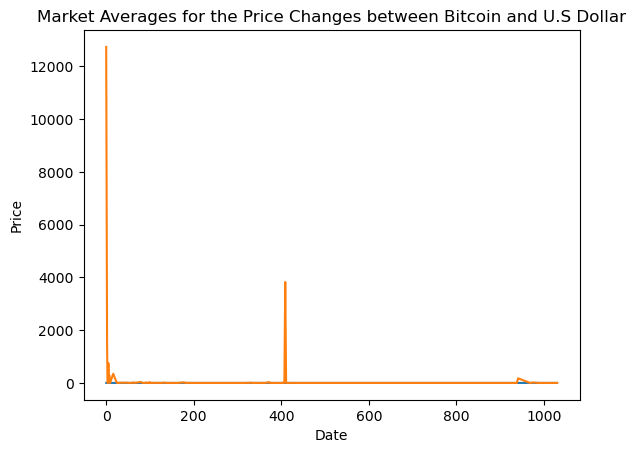

In [13]:
import matplotlib.pyplot as plt

#Plot the data
#plt.plot(df_clean.index, df_clean[["price_btc", "price_usd"]])
df["price_btc"].plot()
df["price_usd"].plot()

#Add labels and titles
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Market Averages for the Price Changes between Bitcoin and U.S Dollar")

#Show the plot
plt.show()

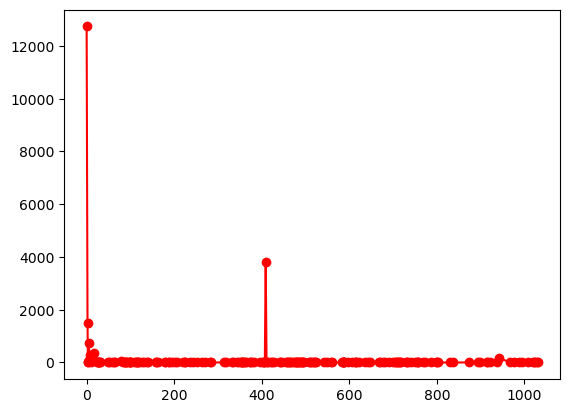

In [14]:
#Plot the data with red circles as markers
plt.plot(df_clean.index, df_clean["price_usd"], "r-o")

<BarContainer object of 186 artists>

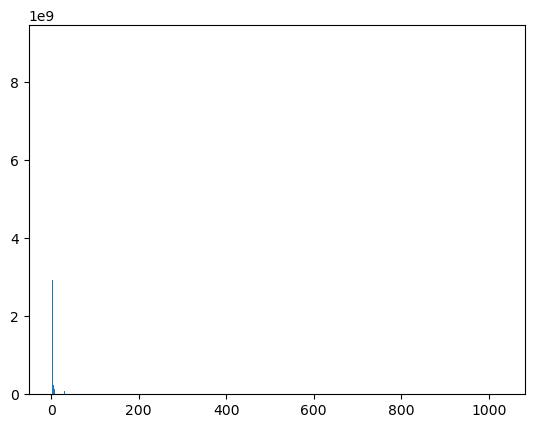

In [15]:
plt.bar(df_clean.index, df_clean["24h_volume_usd"])

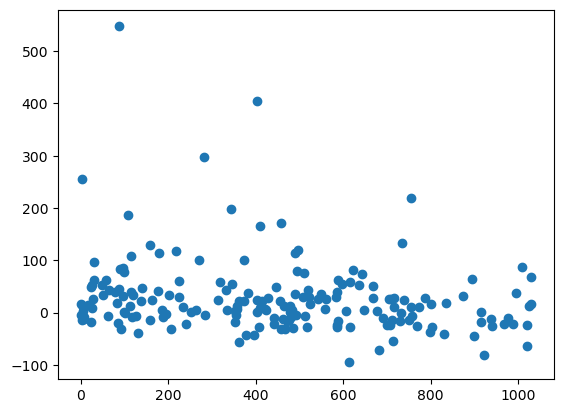

In [16]:
plt.scatter(df_clean.index, df_clean["percent_change_7d"])

In [17]:
class Portfolio:
    def __init__(self):
        self.df_clean = {"XMR": 100, "ADA": 50, "GRT": 200}  # Dictionary to hold stocks in the Portfolio
    
    def add_stock(self, symbol, shares):
        self.df_clean[symbol] = shares
    
    def remove_stock(self, symbol):
        del self.df_clean[symbol]
        
    def get_stocks(self):
        return list(self.df_clean.keys())
    
    def get_shares(self, symbol):
        return self.df_clean[symbol]

# Create a new portfolio
p = Portfolio()

# Add some stocks to the portfolio
p.add_stock("XMR", 100)
p.add_stock("ADA", 50)
p.add_stock("GRT", 200)

# Print the stocks in the portfolio
print(p.get_stocks())

# Output: ['XMR', 'ADA', 'GRT']

['XMR', 'ADA', 'GRT']


In [18]:
import pandas as pd

def liquidity(data):
    #Calculate the liquidity as the product of the volume and the inverse of the spread
    data["Liquidity"] = df_clean["24h_volume_usd"] / (data["available_supply"] - data["price_usd"])
    return data

#Load the market data into a data frame
df = pd.read_csv("TotalMarketCSV File.csv")

#Calculate the liquidity of the stocks
df = liquidity(df)

#Print the liqudity of stocks

print(df["Liquidity"])

0       539.031514
1              NaN
2        65.998826
3         1.056326
4         0.005976
           ...    
1321           NaN
1322           NaN
1323           NaN
1324           NaN
1325           NaN
Name: Liquidity, Length: 1326, dtype: float64


In [19]:
!pip install -U scikit-learn

     ---------------------------------------- 9.2/9.2 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the crypto data into a data frame Percentile Changes
df = df_clean

# Split the data into features and labels
X = df[["percent_change_1h", "percent_change_7d", "price_usd"]]
y = df["24h_volume_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a random forest regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print("R^2 score:", score)

R^2 score: -0.020892359178417808


In [21]:
import sklearn
print(dir(sklearn.preprocessing))

['Binarizer', 'FunctionTransformer', 'KBinsDiscretizer', 'KernelCenterer', 'LabelBinarizer', 'LabelEncoder', 'MaxAbsScaler', 'MinMaxScaler', 'MultiLabelBinarizer', 'Normalizer', 'OneHotEncoder', 'OrdinalEncoder', 'PolynomialFeatures', 'PowerTransformer', 'QuantileTransformer', 'RobustScaler', 'SplineTransformer', 'StandardScaler', 'TargetEncoder', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_csr_polynomial_expansion', '_data', '_discretization', '_encoders', '_function_transformer', '_label', '_polynomial', '_target_encoder', '_target_encoder_fast', 'add_dummy_feature', 'binarize', 'label_binarize', 'maxabs_scale', 'minmax_scale', 'normalize', 'power_transform', 'quantile_transform', 'robust_scale', 'scale']


In [22]:
#Train a random forest regressor on the data
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

#Make predictions on the crypto data
predictions = regr.predict(X_test)
print(predictions)

[2.86332782e+07 4.14071038e+05 4.64569698e+05 4.68497287e+06
 3.11925353e+05 1.16033405e+06 4.79675133e+07 2.21579810e+07
 8.31626221e+05 2.38305500e+06 2.28734335e+07 3.98620016e+07
 2.68388875e+06 6.92747106e+04 6.79427184e+06 1.82175253e+06
 3.41755442e+05 3.27062639e+07 5.61840197e+05 4.71726651e+07
 2.78660129e+05 2.37287685e+05 2.17955732e+05 4.99815918e+05
 6.38563319e+03 4.31215048e+07 1.04343912e+05 1.04333292e+05
 1.96313101e+06 1.00808590e+04 2.02457661e+03 9.86190229e+05
 2.86488961e+07 2.90225270e+06 1.16113912e+07 5.34351689e+06
 1.86471277e+06 4.85318843e+06 1.76085235e+07 2.93260658e+07
 1.47843900e+06 7.15599579e+06 1.08366141e+07 1.24925387e+07
 1.12117230e+07 2.08693051e+06 7.89657323e+05 6.84658270e+05
 6.41187501e+05 5.88122889e+06 2.96788582e+05 8.52457419e+05
 4.65266938e+05 1.34127409e+06 1.12027759e+06 1.18102742e+06
 4.09629847e+07 2.20340162e+06 1.37599228e+07 5.64795007e+06
 2.26651233e+03 4.93375275e+07]


In [23]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Load the asset data into a data frame for Portfolio Management
df = pd.read_csv("TotalMarketCSV File.csv")

# Calculate the returns of the assets
df["Return"] = df["price_usd"].pct_change()

# Print the mean and standard deviation of the returns
print("Mean return:", df["Return"].mean())
print("Standard deviation:", df["Return"].std())

# Calculate the sharpe ratio of assets
sharpe_ratio = df["Return"].mean() / df["Return"].std()
print("Sharpe ratio:", sharpe_ratio)

# Calculate the correlations between the assets
correlations = df.corr()
print("Asset correlations")
print(correlations)

# Optimize the portfolio using the Markowitz Model
returns = df["Return"].values
covariance = df["Return"].cov()

# Set the target return and the constraints
target_return = 0.1
constraints = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

# Define the bounds for the optimization
num_assets = len(df.columns) - 1
bnds = tuple((0, 1) for _ in range(num_assets))

# Minimize the portfolio variance
portfolio_variance = lambda x: np.dot(x, np.dot(covariance, x))
result = minimize(portfolio_variance, num_assets * [1. / num_assets],
                  method="SLSQP", bounds=bnds, constraints=constraints)
optimal_weights = result["x"]
print("Optimal weights:", optimal_weights)


Mean return: 62554.78822312827
Standard deviation: 1340582.0090027824
Sharpe ratio: 0.046662410656742176
Asset correlations
                    Unnamed: 0  24h_volume_usd  available_supply  \
Unnamed: 0            1.000000       -0.100141         -0.025381   
24h_volume_usd       -0.100141        1.000000         -0.004357   
available_supply     -0.025381       -0.004357          1.000000   
last_updated         -0.152718       -0.022068          0.007836   
market_cap_usd       -0.090380        0.962901         -0.003039   
max_supply           -0.037318       -0.007268         -0.005606   
percent_change_1h     0.013322       -0.005457         -0.015611   
percent_change_24h    0.011651        0.011719          0.058239   
percent_change_7d    -0.067939        0.011986         -0.012988   
price_btc             0.000746        0.027201         -0.003090   
price_usd             0.000719        0.027724         -0.003091   
rank                  1.000000       -0.100141         -0.02

C:\Users\gideo\AppData\Local\Temp\ipykernel_13584\36443125.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


TypeError: Series.cov() missing 1 required positional argument: 'other'